## This code implements K-Nearest Neighbours from scratch on Iris Dataset

In [1]:
# This is a code to implement K-Nearst Neighbours from scratcch on Iris Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
dataset = load_iris()

print(dataset.keys())
print(dataset.target_names)
print(dataset.feature_names)

x = dataset.data
y = dataset.target

y = y.reshape((y.shape[0], 1))

df = pd.DataFrame(x)
df.columns = dataset.feature_names
df.head()
df.describe()

print(x.shape, y.shape)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4) (150, 1)


In [3]:
data = df.copy()
data['Flower Type'] = y

data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower Type
sepal length (cm),1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length (cm),0.871754,-0.420516,1.000000,0.962757,0.949043
petal width (cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Flower Type,0.782561,-0.419446,0.949043,0.956464,1.000000


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
(150, 1)


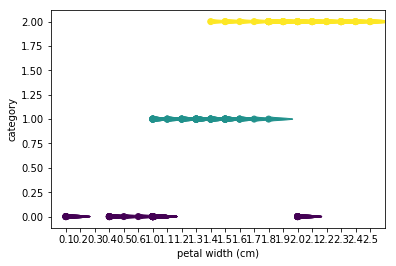

In [4]:
print(df.columns)

a1 = df[['petal width (cm)']]
print(a1.shape)



plt.scatter(a1, y, c = y)
plt.xlabel('petal width (cm)')
plt.ylabel('category')
plt.show()


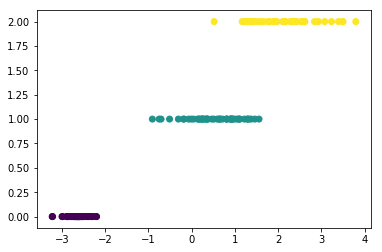

(150, 1)
(150, 1)


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 1)
x_new = PCA.fit_transform(pca, x)

plt.scatter(x_new, y, c = y)
plt.show()
print(x_new.shape)
print(y.shape)

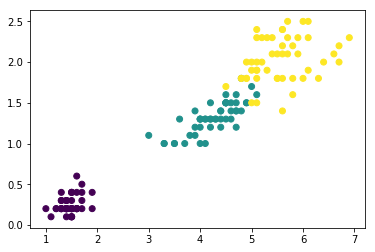

In [6]:
x1 = df.iloc[:, 2:]
x1.shape

plt.scatter(x1.iloc[:, 0], x1.iloc[:, 1], c = y[:, 0])
plt.show()

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
print(type(x_train))
print(y_train[:5])

<class 'numpy.ndarray'>
[[1]
 [2]
 [2]
 [1]
 [2]]


In [8]:
#finds distance between two points
def findDist(x1, x2):
    
    #distance, d = sq root( (x1 - x2)^2 + (y1 - y2)^2 + (z1 - z2)^2... ) 
    
    l = len(x1)
    
    dist = 0
    for i in range(l):
        diff = x1[i] - x2[i]    
        dist += diff ** 2
    return dist ** (0.5)

In [9]:
def mostFreq(nearestK):    
    unique_elements, counts_elements = np.unique(nearestK, return_counts=True)
    return unique_elements

In [24]:
def k_nearest_neighbours(x_train, y_train, x_test, k):    
    m = x_train.shape[0] #no. of training samples
    n = x_train.shape[1] #number of features
    t = x_test.shape[0] #number of samples in test set
    
    dist = np.zeros((m,2))
    res = np.zeros(t) #result vector of k size
    
    for j in range(t):
        test = x_test[j, :]

        for i in range(m):
            train = x_train[i, :]

            #find distnace between the test sample with all training points
            dist[i, 0] = findDist(test, train)
            dist[i, 1] = y_train[i]

        #sort the distances wrt dist
        sortedDist = dist[np.argsort(dist[:, 0])]

        #store labels of k nearest points
        nearestK = sortedDist[:k, 1]

        freq = mostFreq(nearestK)
        res[j] = freq[0]
    return res

In [25]:
def accuracy(x,y):
    l = len(x)
    res = 0
    for i in range(l):
        if x[i] == y[i]:
            res += 1
    return res/l

In [36]:
limit = 30
acc = np.zeros(limit)
for k in range(1,limit):
    y_pred = k_nearest_neighbours(x_train, y_train, x_test, k)
    acc[k] = accuracy(y_test, y_pred)

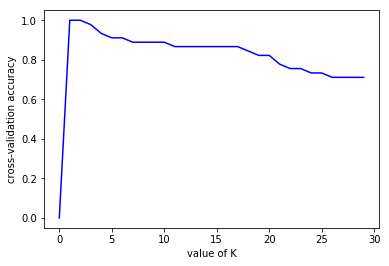

In [38]:
xaxis = range(limit)
plt.plot(xaxis, acc, 'b-')
plt.xlabel('value of K')
plt.ylabel('cross-validation accuracy')
plt.show()

In [40]:
acc

array([0.        , 1.        , 1.        , 0.97777778, 0.93333333,
       0.91111111, 0.91111111, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.86666667, 0.86666667, 0.86666667, 0.86666667,
       0.86666667, 0.86666667, 0.86666667, 0.84444444, 0.82222222,
       0.82222222, 0.77777778, 0.75555556, 0.75555556, 0.73333333,
       0.73333333, 0.71111111, 0.71111111, 0.71111111, 0.71111111])

In [41]:
y_pred = k_nearest_neighbours(x_train, y_train, x_test, 2)
accuracy(y_pred, y_test)

1.0